# Workout Recommender Demo

This notebook demonstrates how to use the workout recommender system to generate personalized exercise recommendations.

In [9]:
import sys
sys.path.append('..')

from src.data_processor import ExerciseDataProcessor
from src.recommender import WorkoutRecommender
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Load and Process Data

In [11]:
# Initialize data processor
processor = ExerciseDataProcessor()

# Load raw data
# Note: Replace 'your_data_file.csv' with your actual data file
raw_data = processor.load_raw_data('MetaMotion/A-bench-heavy2-rpe8_MetaWear_2019-01-11T16.10.08.270_C42732BE255C_Accelerometer_12.500Hz_1.4.4.csv')

# Display first few rows of raw data
raw_data.head()

,epoch (ms),time (01:00),elapsed (s),x-axis (g),y-axis (g),z-axis (g)
0,1547219408431,2019-01-11T16:10:08.431,0.00,0.010,0.964,-0.087
1,1547219408511,2019-01-11T16:10:08.511,0.08,0.000,0.961,-0.069
2,1547219408591,2019-01-11T16:10:08.591,0.16,0.001,0.974,-0.087
3,1547219408671,2019-01-11T16:10:08.671,0.24,-0.012,0.971,-0.084
4,1547219408751,2019-01-11T16:10:08.751,0.32,-0.013,0.954,-0.094


In [13]:
# Preprocess the data
processed_data = processor.preprocess_data()

# Display processed data info
processed_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   epoch (ms)    206 non-null    int64   
 1   time (01:00)  206 non-null    category
 2   elapsed (s)   206 non-null    float64 
 3   x-axis (g)    206 non-null    float64 
 4   y-axis (g)    206 non-null    float64 
 5   z-axis (g)    206 non-null    float64 
dtypes: category(1), float64(4), int64(1)
memory usage: 18.3 KB


E:\AI\notebooks\..\src\data_processor.py:58: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')


## 2. Initialize and Use the Recommender

In [14]:
# Initialize recommender
recommender = WorkoutRecommender()

# Load processed data into recommender
recommender.load_data(processed_data)

In [17]:
# Example user preferences
user_preferences = {
    'difficulty_level': 3,  # 1-5 scale
    'duration': 30,        # minutes
    'intensity': 4,        # 1-5 scale
    'equipment_needed': 1  # 1 for minimal equipment
}

# Get recommendations
recommendations = recommender.get_recommendations(
    user_preferences=user_preferences,
    n_recommendations=5
)

# Display recommendations
# Display recommendations
for i, rec in enumerate(recommendations, 1):
    print(f"\nRecommendation {i}:")
    
    # If recommendation is a flat dictionary:
    print(f"Exercise: {rec.get('name', 'N/A')}")
    print(f"Similarity Score: {rec.get('similarity_score', 0):.2f}")
    print(f"Details: {rec}")



Recommendation 1:
Exercise: N/A
Similarity Score: 0.00
Details: {'exercise': {'epoch (ms)': 1547219424831, 'time (01:00)': '2019-01-11T16:10:24.831', 'elapsed (s)': 16.4, 'x-axis (g)': 0.021, 'y-axis (g)': 0.966, 'z-axis (g)': -0.108}, 'similarity_score': np.float64(0.0)}

Recommendation 2:
Exercise: N/A
Similarity Score: 0.00
Details: {'exercise': {'epoch (ms)': 1547219424751, 'time (01:00)': '2019-01-11T16:10:24.751', 'elapsed (s)': 16.32, 'x-axis (g)': 0.008, 'y-axis (g)': 0.937, 'z-axis (g)': -0.085}, 'similarity_score': np.float64(0.0)}

Recommendation 3:
Exercise: N/A
Similarity Score: 0.00
Details: {'exercise': {'epoch (ms)': 1547219424671, 'time (01:00)': '2019-01-11T16:10:24.671', 'elapsed (s)': 16.24, 'x-axis (g)': 0.011, 'y-axis (g)': 0.978, 'z-axis (g)': -0.091}, 'similarity_score': np.float64(0.0)}

Recommendation 4:
Exercise: N/A
Similarity Score: 0.00
Details: {'exercise': {'epoch (ms)': 1547219424591, 'time (01:00)': '2019-01-11T16:10:24.591', 'elapsed (s)': 16.16, 'x-

## 3. Visualize Recommendations

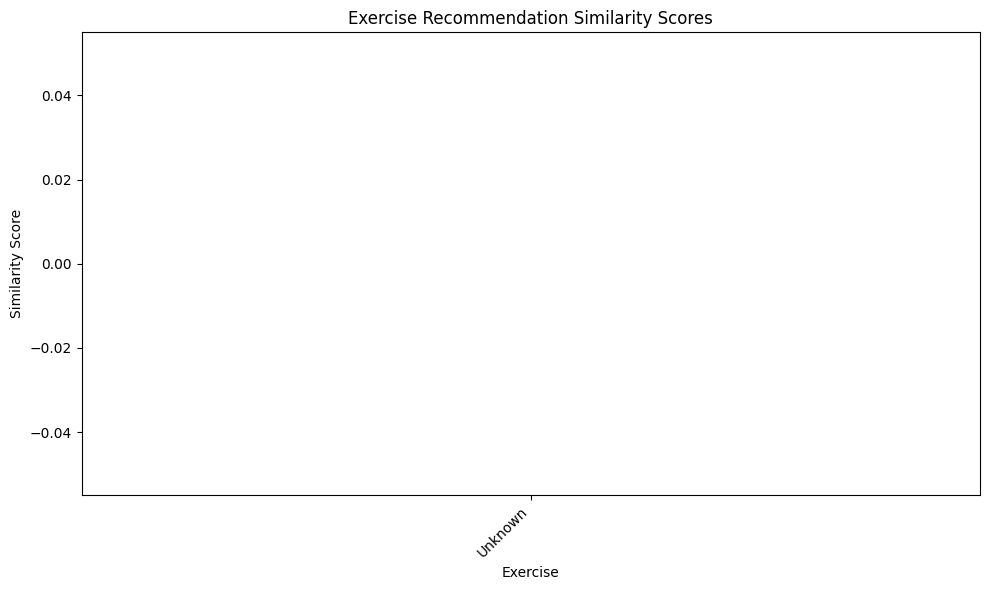

In [19]:
# Create a DataFrame from recommendations
rec_df = pd.DataFrame([
    {
        'Exercise': rec.get('name', 'Unknown'),
        'Similarity Score': rec.get('similarity_score', 0)
    }
    for rec in recommendations
])

# Plot similarity scores
plt.figure(figsize=(10, 6))
sns.barplot(data=rec_df, x='Exercise', y='Similarity Score')
plt.xticks(rotation=45, ha='right')
plt.title('Exercise Recommendation Similarity Scores')
plt.tight_layout()
plt.show()
